In [7]:
%load_ext lab_black

# SVM и его ядра
__Суммарное количество баллов: 10__

# Задание 1 (7 баллов)

В этом задании вам не нужно будет реализовать SVM, а научиться его применять.

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [142]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = [12, 8]

In [137]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X_blobs2, y_blobs2 = make_blobs(
    n_samples=1000, random_state=4, center_box=(-2, 2), cluster_std=0.4, centers=2
)

In [138]:
params = [
    {"kernel": "linear"},
    {"kernel": "rbf"},
    {"kernel": "poly", "degree": 2},
    {"kernel": "poly", "degree": 3},
    {"kernel": "poly", "degree": 5},
]

In [163]:
def apply_visualize_svm(param, X, y):
    svc = SVC(C=10, **param)
    svc.fit(X, y)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    d = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, d), np.arange(y_min, y_max, d))
    color = svc.predict(
        np.vstack([xx.reshape(-1), yy.reshape(-1)]).T,
    )
    plt.contourf(xx, yy, color.reshape(xx.shape), alpha=0.5, cmap=plt.cm.coolwarm)
    edgecolors = np.full(X.shape[0], "none", dtype=object)
    edgecolors[svc.support_] = "white"
    plt.scatter(
        x=X[:, 0],
        y=X[:, 1],
        c=y,
        linewidths=0.8,
        s=20,
        edgecolors=edgecolors,
        cmap=plt.cm.coolwarm,
    )
    param_str = ", ".join([f"{k}: {v}" for k, v in param.items()])
    plt.title(f"SVC; {param_str}")
    plt.show()

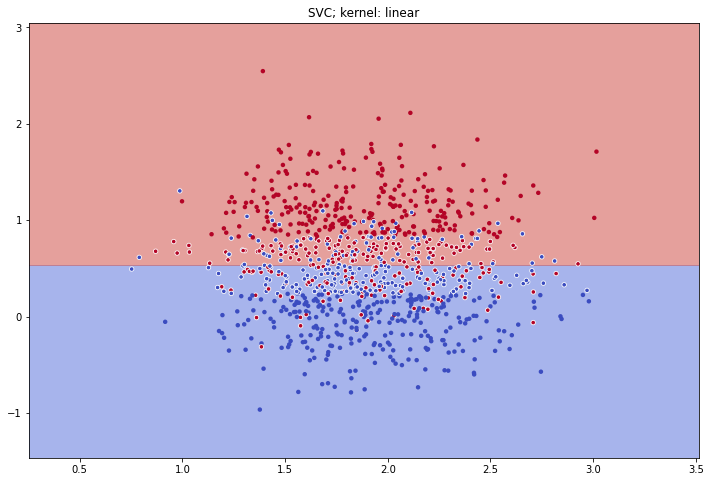

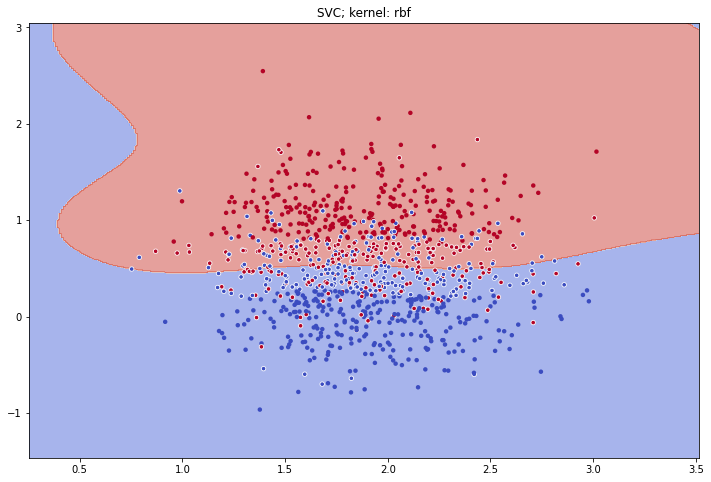

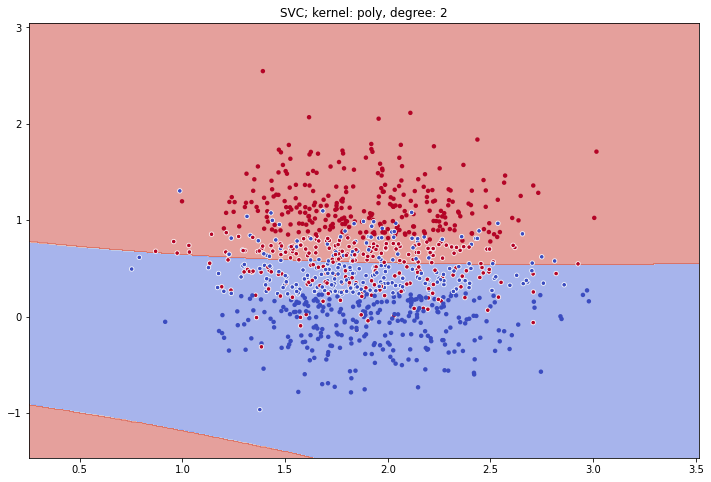

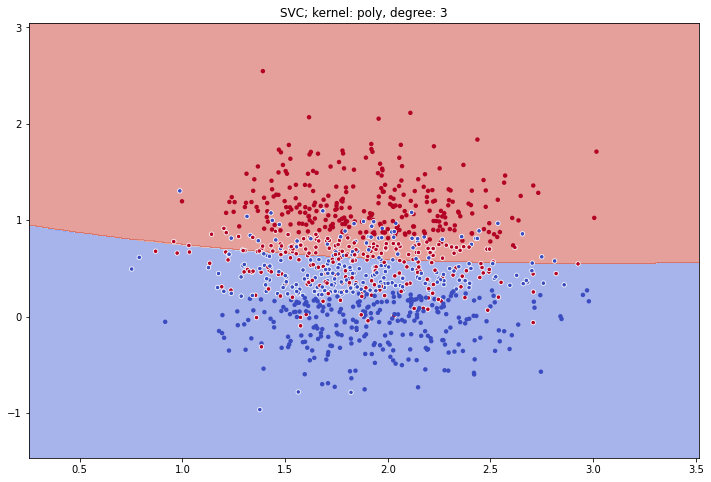

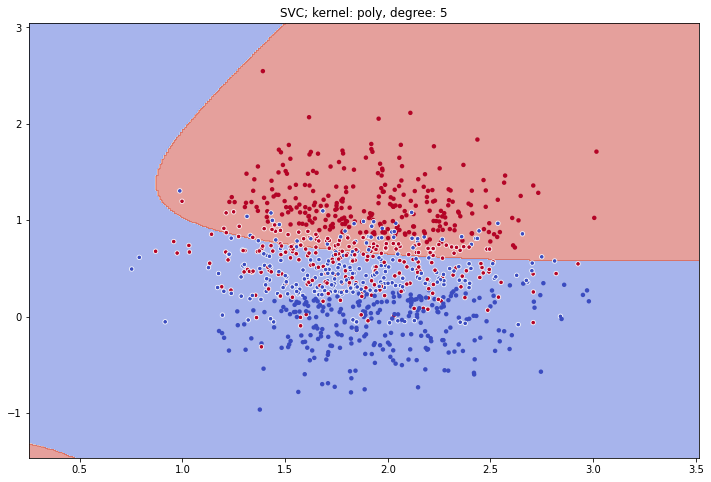

In [164]:
for param in params:
    apply_visualize_svm(param, X_blobs2, y_blobs2)

# Задание 2 (3 балла)

Протестируйте SVM на датасете spam. Для этой задачи используйте данные x_spam_train и y_spam_train:

1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики precision, recall, accuracy для модели SVM. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните время работы SVM и Random Forest при близкой точности.

Ответьте на следующие вопросы:
1. Какой нужен препроцессинг данных для моделей?
2. Какая модель делает предсказания лучше? Предположите, почему.

In [166]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Обучите модель на всех данных из x_spam_train и y_spam_train.
Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [157]:
DATA_PATH = Path("./HW_SWM_data/homework-svm-ib-22/")


def load_data(data_path=DATA_PATH):
    train_x = pd.read_csv(data_path / "x_spam_train.csv").drop("Id", axis=1).values
    train_y = (
        pd.read_csv(data_path / "y_spam_train.csv")
        .drop("Id", axis=1)
        .values.reshape(-1)
    )
    test_x = pd.read_csv(data_path / "x_spam_test.csv").drop("Id", axis=1).values
    return train_x, train_y, test_x

In [158]:
train_x, train_y, test_x = load_data()

In [176]:
param_grid = [
    {
        "C": [
            1,
            10,
        ],
        "kernel": ["linear"],
    },
]

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=8, verbose=4, scoring="f1")
grid_search.fit(train_x,train_y)

In [ ]:
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test["Id"]
submission["Expected"] = #YOUR CODE
submission.to_csv('submission.csv', index=False)